In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

red = "#D81B60"
yellow = "#FFC107"
blue = "#1E88E5"
green = "#004D40"

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [8]:
strudel_df = pd.read_csv('../results/rowclass/trugritte_results_row_False_line_False.csv')
magritte_df = pd.read_csv('../results/rowclass/magritte_new_results.csv')
strugritte_df = pd.read_csv('../results/rowclass/strugritte_new_results_row_False_line_True.csv')

strudel_df = strudel_df.rename(columns={"strugritte": "strudel"})
df = pd.merge(strudel_df, magritte_df, on="measure")
df = pd.merge(df, strugritte_df, on="measure")
res = df.set_index("measure")*100
res = res.transpose()

display(res)

measure,mendeley_data_f1,mendeley_header_f1,mendeley_metadata_f1,mendeley_group_f1,mendeley_derived_f1,mendeley_notes_f1,mendeley_accuracy,mendeley_macro_avg,troy_data_f1,troy_header_f1,...,cius_accuracy,cius_macro_avg,govuk_data_f1,govuk_header_f1,govuk_metadata_f1,govuk_group_f1,govuk_derived_f1,govuk_notes_f1,govuk_accuracy,govuk_macro_avg
strudel,95.977129,40.000000,58.342792,5.882353,23.529412,42.767296,90.756757,44.416497,94.952161,89.871087,...,94.716088,67.726107,93.608222,73.273273,52.081633,67.931034,46.153846,91.710232,87.931521,70.793040
magritte_0,77.892122,24.089636,37.158470,0.000000,1.751313,1.847575,60.912298,23.789853,9.387223,66.106443,...,64.764788,80.639182,64.910114,63.428571,93.738602,85.937500,24.972046,93.551913,62.987285,71.089791
strugritte,94.435580,38.554217,38.421053,6.896552,30.769231,13.461538,88.702703,37.089695,94.137187,83.175803,...,96.727129,87.310793,97.199320,95.218295,95.310668,88.268156,60.349127,97.657394,95.372025,89.000494


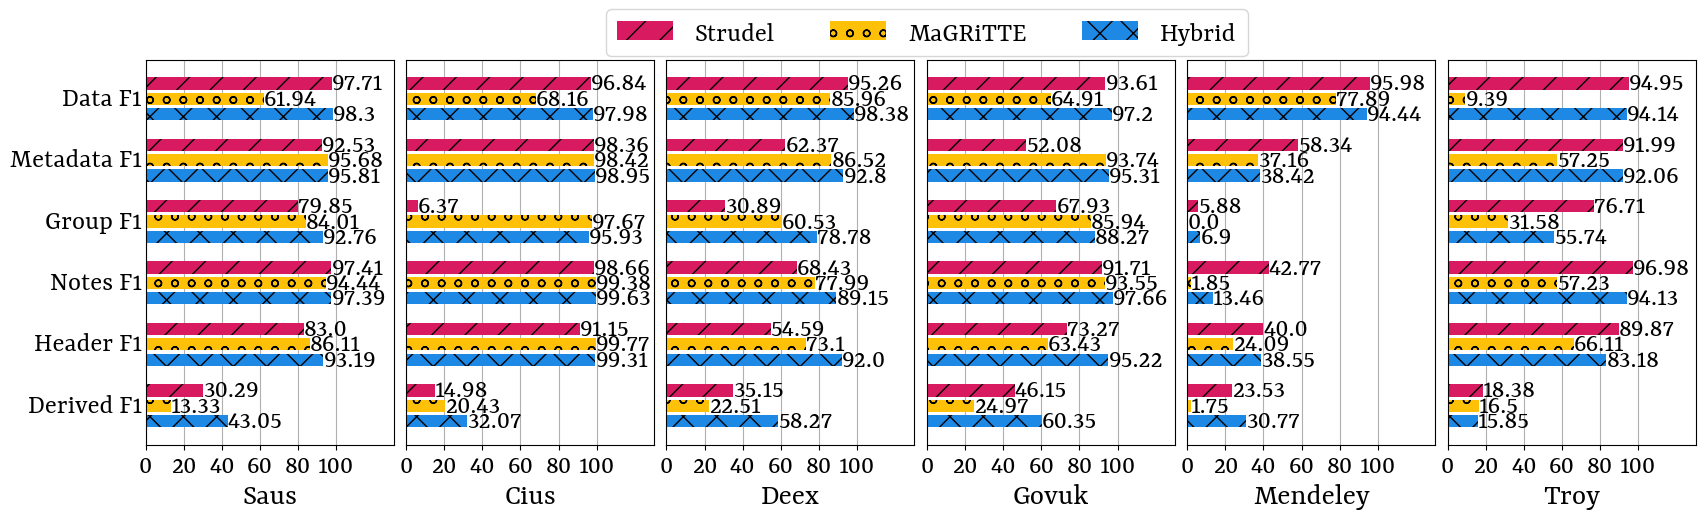

In [10]:
from matplotlib.patches import Patch

plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

colors = [red, yellow, blue]
patterns = ['/', 'o', 'x']

def plot_bar(ax, title, bars):
  ax.grid(zorder=-10)
  ax.set_axisbelow(True)

  n_rows = len(bars[0])
  positions = [np.arange(n_rows)+((n_rows+1)*idx) for idx in range(len(bars))]
  for j,bar in enumerate(bars):
    ax.barh(positions[j], bar, color=colors, hatch=patterns, ) 

  ypad =0
  xpad=.02
  for j, b in enumerate(bars):
    for i, v in enumerate(b):
      ax.text(v+xpad, (j*(n_rows+1))+i+ypad, str(round(v, 2)), color='black', size=labelsize, va='center')

  ax.set_yticks([])
  ax.set_xlabel(title, size=labelsize+2);
  ticks = [0, 20, 40, 60, 80, 100]
  ax.set_xticks(ticks=ticks, labels=ticks,size=labelsize);
  ax.set_xlim(0, 130)

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(nrows=1,ncols=6, wspace=0.05)
axs = gs.subplots(sharey=True)

# datasets = set([x.split("_")[0] for x in res.columns])
datasets = ["saus", "cius", "deex","govuk","mendeley","troy"]

# measures = set([x.split("_")[1] for x in res.columns if "f1" in x])
measures = ["data","metadata", "group", "notes", "header", "derived"]
for idx, ds in enumerate(datasets):
  bars = [res[f"{ds}_{m}_f1"] for m in measures]
  plot_bar(axs[idx], ds.title(), bars)

axs[0].invert_yaxis()

n_rows = len(bars[0])
xpoint = -2
for idx,m in enumerate(measures):
  axs[0].text(xpoint, 1+((n_rows+1)*idx), m.title()+" F1", ha='right', va='center', size=labelsize)

custom_bars = [
              Patch(facecolor=colors[0], hatch=patterns[0]),
              Patch(facecolor=colors[1], hatch=patterns[1]),
              Patch(facecolor=colors[2], hatch=patterns[2]),
              ]

axs[1].legend(handles=custom_bars,
              labels = ["Strudel", "MaGRiTTE", "Hybrid"],
              loc='center',
              bbox_to_anchor=(2.1, 1.07),
              ncols=3,
              fontsize=labelsize)

plt.savefig('rowclass_results.png', dpi=300, bbox_inches='tight')